In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('solar_system.csv')
df

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3
5,Rotation Period (hours),1407.6,-5832.5,23.9,655.7,24.6,9.9,10.7,-17.2,16.1,-153.3
6,Length of Day (hours),4222.6,2802.0,24.0,708.7,24.7,9.9,10.7,17.2,16.1,153.3
7,Distance from Sun (10^6 km),57.9,108.2,149.6,0.384,228.0,778.5,1432.0,2867.0,4515.0,5906.4
8,Perihelion (10^6 km),46.0,107.5,147.1,0.363,206.7,740.6,1357.6,2732.7,4471.1,4436.8
9,Aphelion (10^6 km),69.8,108.9,152.1,0.406,249.3,816.4,1506.5,3001.4,4558.9,7375.9


In [3]:
df.shape

(20, 11)

In [4]:
df.head(5)

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3


In [5]:
df.tail(5)

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
15,Mean Temperature (C),167,464,15,-20,-65,-110,-140,-195,-200,-225
16,Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
17,Number of Moons,0,0,1,0,2,95,274,28,16,5
18,Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
19,Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Attribute  20 non-null     object
 1   Mercury    20 non-null     object
 2   Venus      20 non-null     object
 3   Earth      20 non-null     object
 4   Moon       20 non-null     object
 5   Mars       20 non-null     object
 6   Jupiter    20 non-null     object
 7   Saturn     20 non-null     object
 8   Uranus     20 non-null     object
 9   Neptune    20 non-null     object
 10  Pluto      20 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


In [7]:
print(df['Attribute'])

0                  Mass (10^24kg)
1                   Diameter (km)
2                Density (kg/m^3)
3                 Gravity (m/s^2)
4          Escape Velocity (km/s)
5         Rotation Period (hours)
6           Length of Day (hours)
7     Distance from Sun (10^6 km)
8            Perihelion (10^6 km)
9              Aphelion (10^6 km)
10          Orbital Period (days)
11        Orbital Velocity (km/s)
12      Orbital Inclination (deg)
13           Orbital Eccentricity
14       Obliquity to Orbit (deg)
15           Mean Temperature (C)
16        Surface Pressure (bars)
17                Number of Moons
18                   Ring System?
19         Global Magnetic Field?
Name: Attribute, dtype: object


In [8]:
row_orbital_period = df.loc[10][1:].astype(float)
row_orbital_period

Mercury       88.0
Venus        224.7
Earth        365.2
Moon          27.3
Mars         687.0
Jupiter     4331.0
Saturn     10747.0
Uranus     30589.0
Neptune    59800.0
Pluto      90560.0
Name: 10, dtype: float64

In [9]:
row_perihelion = df.loc[8][1:].astype(float)
row_perihelion

Mercury      46.000
Venus       107.500
Earth       147.100
Moon          0.363
Mars        206.700
Jupiter     740.600
Saturn     1357.600
Uranus     2732.700
Neptune    4471.100
Pluto      4436.800
Name: 8, dtype: float64

In [10]:
row_aphelion = df.loc[9][1:].astype(float)
row_aphelion

Mercury      69.800
Venus       108.900
Earth       152.100
Moon          0.406
Mars        249.300
Jupiter     816.400
Saturn     1506.500
Uranus     3001.400
Neptune    4558.900
Pluto      7375.900
Name: 9, dtype: float64

In [11]:
# semi major axis = half of the major axis, or the largest radius of an eclipse
# Perihelion = point in a planet's orbit that is closest to the sun
# Aphelion = point in a planet's orbit that is farthest from the sun

In [12]:
semi_major_axis = (row_perihelion + row_aphelion) / 2
semi_major_axis

Mercury      57.9000
Venus       108.2000
Earth       149.6000
Moon          0.3845
Mars        228.0000
Jupiter     778.5000
Saturn     1432.0500
Uranus     2867.0500
Neptune    4515.0000
Pluto      5906.3500
dtype: float64

In [19]:
semi_major_axis_row = pd.Series(
    ['Semi Major Axis (10^6 km)'] + list(semi_major_axis),
    index = df.columns)

df = pd.concat([df, semi_major_axis_row.to_frame().T], ignore_index = True)
df

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3
5,Rotation Period (hours),1407.6,-5832.5,23.9,655.7,24.6,9.9,10.7,-17.2,16.1,-153.3
6,Length of Day (hours),4222.6,2802.0,24.0,708.7,24.7,9.9,10.7,17.2,16.1,153.3
7,Distance from Sun (10^6 km),57.9,108.2,149.6,0.384,228.0,778.5,1432.0,2867.0,4515.0,5906.4
8,Perihelion (10^6 km),46.0,107.5,147.1,0.363,206.7,740.6,1357.6,2732.7,4471.1,4436.8
9,Aphelion (10^6 km),69.8,108.9,152.1,0.406,249.3,816.4,1506.5,3001.4,4558.9,7375.9


In [20]:
df.shape

(21, 11)

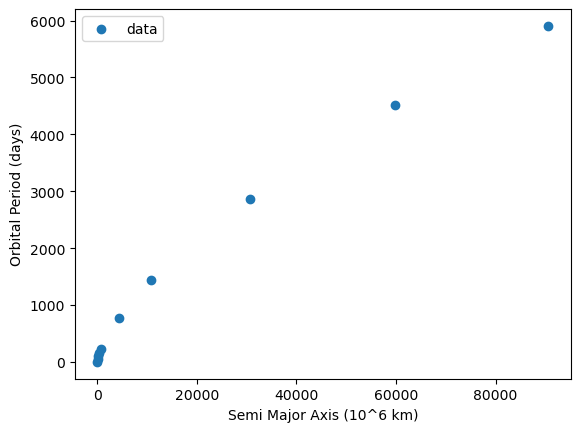

In [31]:
x = row_orbital_period
y = semi_major_axis



plt.figure()
plt.scatter(x, y, label = 'data')
plt.xlabel('Semi Major Axis (10^6 km)')
plt.ylabel('Orbital Period (days)')
plt.title('')
plt.legend()
plt.show()